## 당뇨병 데이터로 다중 회귀
        - LinearRegression
        - SVR
        - RandomForestRegressor
<pcre>
    * MSE 비교
<pcre>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 산점도와 선형회귀선

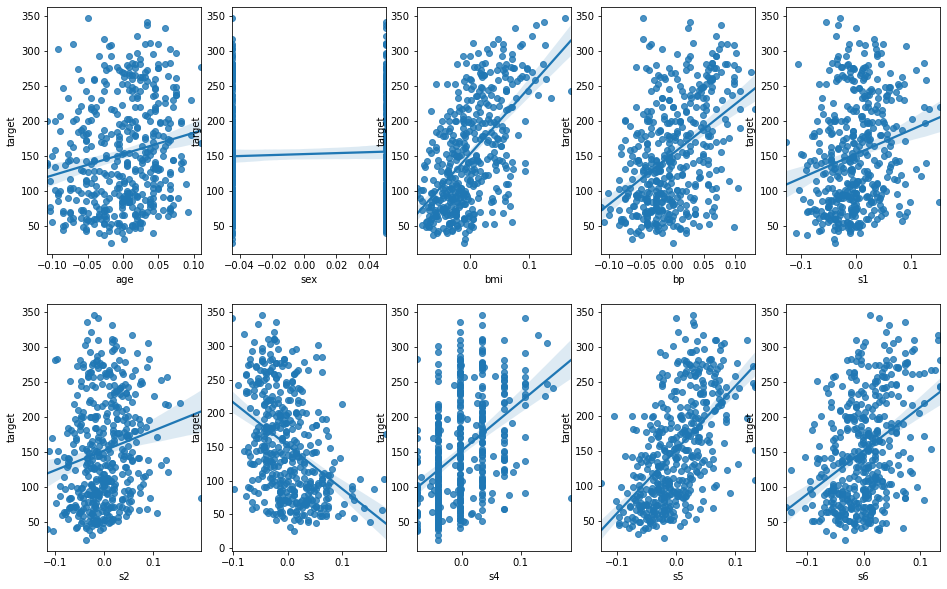

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,10))
for i, feature in enumerate(diabetes.feature_names):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [5]:
# 모델 적용
from sklearn.linear_model import LinearRegression
y = diabetes.target
X = df.target.values.reshape(-1,1)
# X = df['target'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

1.0

In [6]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print('{} - {}'.format(feature, round(r2, 4)))


age - 0.0353
sex - 0.0019
bmi - 0.3439
bp - 0.1949
s1 - 0.045
s2 - 0.0303
s3 - 0.1559
s4 - 0.1853
s5 - 0.3202
s6 - 0.1463


1. 선형회귀

In [7]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
lr.score(X_test, y_test)

0.45584017860891046

In [10]:
lr.coef_, lr.intercept_

(array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
        -656.22582592,  364.21134557,   60.28474402,  182.53318837,
         702.08292875,   68.21197298]),
 151.67372554450927)

In [11]:
pred_lr = lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563165

2. SVM

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

3960.9366880199996

3. RF

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

3824.664311111111

4. MSE 비교

In [19]:
# 모델 별 pred값
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'SVM':pred_sv, 'RF':pred_rf
})
df.head()

,y_test,LR,SVM,RF
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48


In [31]:
# 모델 별 MSE 값
print('1. LR_MSE : {}\n2. SVM : {}\n3. RF :{}'.format(mse_lr, mse_sv, mse_rf))

1. LR_MSE : 2370.1978745563165
2. SVM : 3960.9366880199996
3. RF :3824.664311111111
